In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
# import missingno as mn


df = pd.read_csv('dataset.csv')

print(df.dtypes)
print('===========')
print(df.info())

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

# Fields to be removed

Marital Status,
Application Mode,
Previous Qualifications,
Nacionality,
Mother's qualification,
Father's qualification,
Mother's occupation,
Father's occupation,
Educational Special Needs,
Age at enrollment,
Curricular units 1st sem (evaluations),
Curricular units 1st sem (approved),
Curricular units 1st sem (without evaluations),
Curricular units 2nd sem (evaluations),
Curricular units 2nd sem (approved),
Curricular units 2nd sem (without evaluations),
Inflation rate,
GDP

We decided to remove these fields because they are not relevant to the analysis of the dataset we were interested in for this project. Some of these may be useful for a model later, but for now we are not interested in them.

In [80]:
columns_to_remove = [
    'Marital status', 'Application mode', 'Previous qualification', 'Nacionality',
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", 'Educational special needs', 'Age at enrollment', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 
    'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (evaluations)', 
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 
    'Inflation rate', 'GDP'
]

#remove columns
df = df.drop(columns=columns_to_remove)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance           4424 non-null   int64  
 3   Displaced                            4424 non-null   int64  
 4   Debtor                               4424 non-null   int64  
 5   Tuition fees up to date              4424 non-null   int64  
 6   Gender                               4424 non-null   int64  
 7   Scholarship holder                   4424 non-null   int64  
 8   International                        4424 non-null   int64  
 9   Curricular units 1st sem (credited)  4424 non-null   int64  
 10  Curricular units 1st sem (enrolled)  4424 non-null   int64  
 11  Curricular units 1st sem (grad

In [82]:
#convert the categorical columns from the numerical representation of the category to the category itself using csv file. Each CSV file has the ID, and Course_Name columns. the dataset just has the Id's for these

column_csv_map = {
    'Course': 'tA4_course_names.csv',
    'Gender': 'tA8_gender.csv',
}

def map_id_to_name(df, column_name, csv_file):
    # Load the mapping CSV
    mapping_df = pd.read_csv(csv_file)
    
    # Merge the dataframe to replace ID with names
    df = df.merge(mapping_df, how='left', left_on=column_name, right_on='ID', suffixes=('', '_Name'))
    
    # Drop the original ID columns and rename
    df = df.drop(columns=[column_name, 'ID'])
    df = df.rename(columns={f'{column_name}_Name': column_name})
    
    return df

for column, csv_file in column_csv_map.items():
    df = map_id_to_name(df, column, csv_file)


In [99]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Application order                    4424 non-null   int64  
 1   Daytime/evening attendance           4424 non-null   int64  
 2   Displaced                            4424 non-null   int64  
 3   Debtor                               4424 non-null   int64  
 4   Tuition fees up to date              4424 non-null   int64  
 5   Scholarship holder                   4424 non-null   int64  
 6   International                        4424 non-null   int64  
 7   Curricular units 1st sem (credited)  4424 non-null   int64  
 8   Curricular units 1st sem (enrolled)  4424 non-null   int64  
 9   Curricular units 1st sem (grade)     4424 non-null   float64
 10  Curricular units 2nd sem (credited)  4424 non-null   int64  
 11  Curricular units 2nd sem (enro

,Application order,Daytime/evening attendance,Displaced,Debtor,Tuition fees up to date,Scholarship holder,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Unemployment rate,Target,Course,Gender
0,5,1,1,0,1,0,0,0,0,0.000000,0,0,0.000000,10.8,Dropout,Animation and Multimedia Design,Male
1,1,1,1,0,0,0,0,0,6,14.000000,0,6,13.666667,13.9,Graduate,Tourism,Male
2,5,1,1,0,0,0,0,0,6,0.000000,0,6,0.000000,10.8,Dropout,Communication Design,Male
3,2,1,1,0,1,0,0,0,6,13.428571,0,6,12.400000,9.4,Graduate,Journalism and Communication,Female
4,1,0,0,0,1,0,0,0,6,12.333333,0,6,13.000000,13.9,Graduate,Social Service (evening attendance),Female


Text(0.5, 1.0, 'Missing Data Matrix')

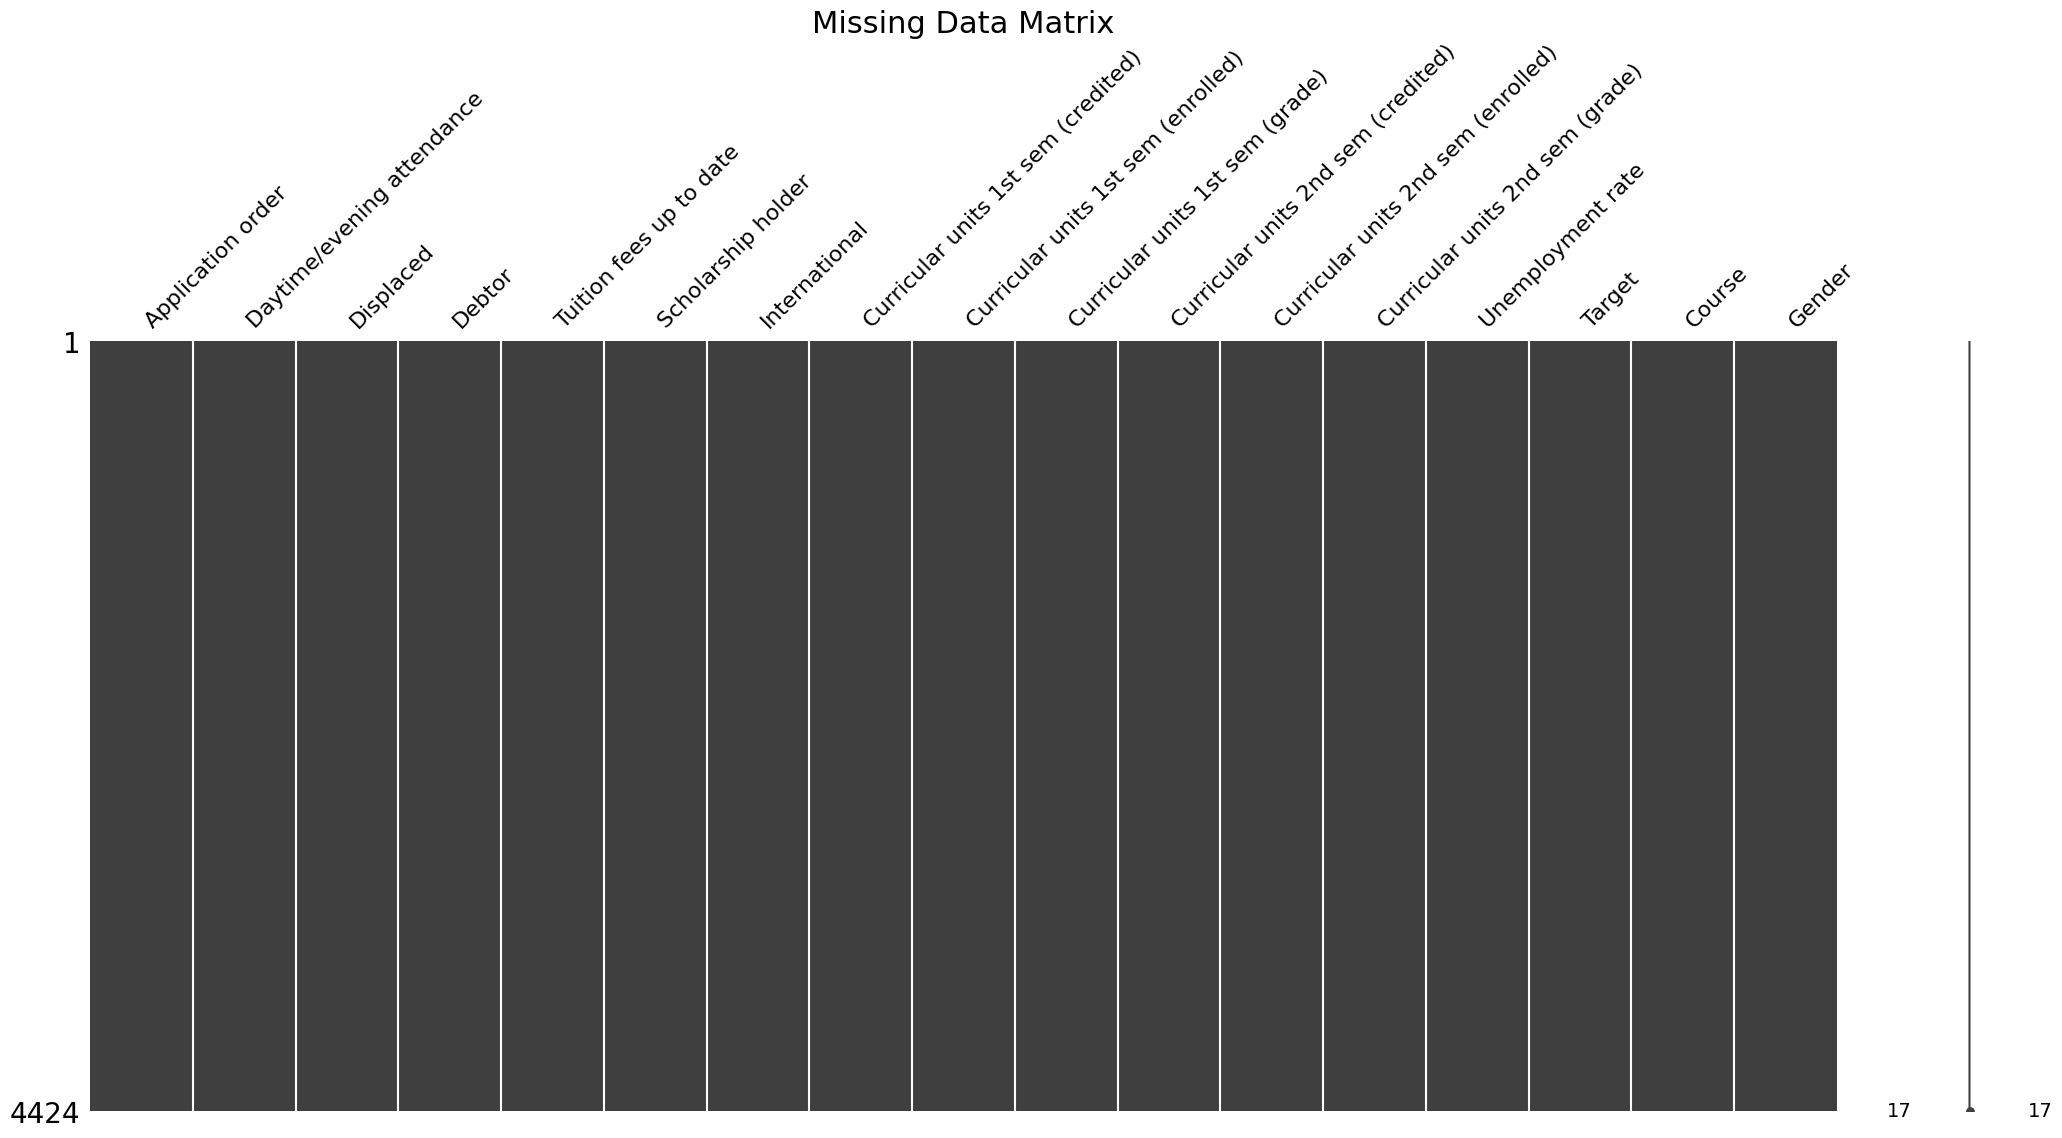

In [84]:
import missingno as mn

mn.matrix(df)
plt.title("Missing Data Matrix",fontsize=22)

## Above is the missing data matrix
You can see the dataset is complete because there are no black bars in the matrix, which would indicate a missing record. Since this dataset was downloaded from Kaggle it most likely has already been imputed or cleaned to remove missing data.

From the kaggle page there is no indication of using a seperate value for missing data, so we can assume that the dataset is complete.

# How many credits were taken by students in the 1st semester?

Text(0.5, 1.0, 'Kernel Density, 0.2 bandwidth')

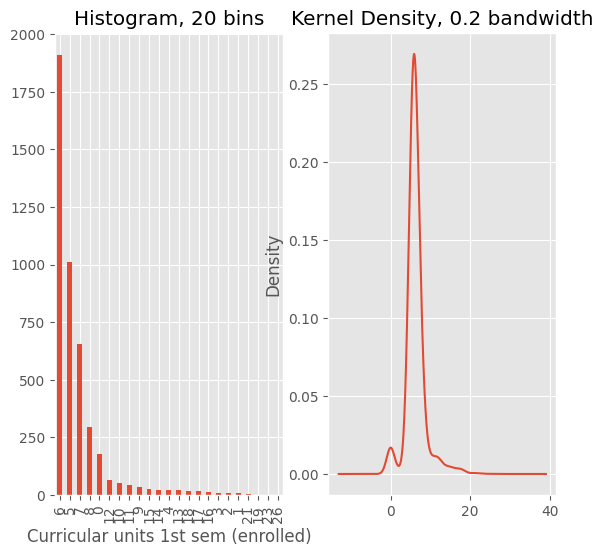

In [96]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))

plt.subplot(1,3,1)
#Curricular units 1st sem (credited)
df['Curricular units 1st sem (enrolled)'].value_counts().plot(kind='bar')
plt.title('Histogram, 20 bins')

#kernel density estimate
plt.subplot(1,3,2)
df['Curricular units 1st sem (enrolled)'].plot.kde(bw_method=0.4)
plt.title('Kernel Density, 0.2 bandwidth')






# Correlation Heatmap

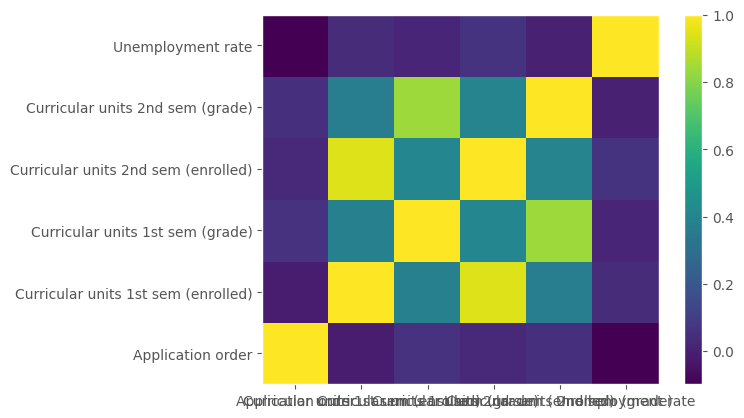

In [98]:
# plot the correlation matrix 
vars_to_use = ['Application order', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (grade)', 'Unemployment rate'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

From this plot we can see that unemployment rate and application order are not very correlated with other items, but The number of units enrolled between 1st and second semester, and the grade between first and second semester are correlated. This is what we would expect because students who are willing to take more credit hours in one semester are likely to take more in the next semester. Also, students who do well in one semester are likely to do well in the next semester.

We see some correlation between number of credit hours enrolled and the grade recieved, but not as high a correlation as between the two semesters. 

# Interesting Question 1: How does Gender impact the dropout rate by course?

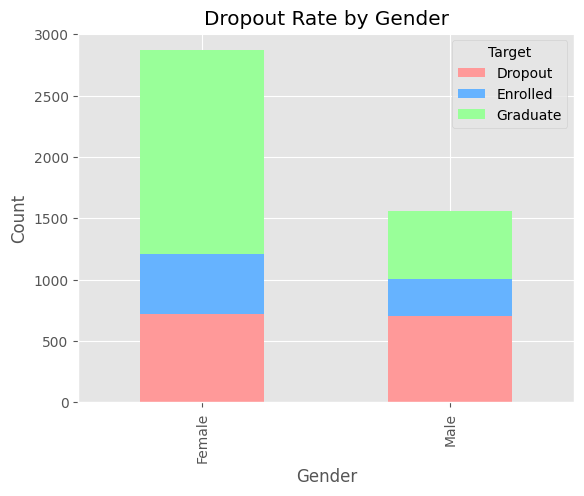

In [102]:
# Drop out rate is the column 'Target' which is either "Dropout" or "Graduate"

# Create a crosstab to count Dropouts and Graduates by Gender
dropout_rate = pd.crosstab(df['Gender'], df['Target'])

# Create the stacked bar chart
dropout_rate.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Dropout Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


As we can see from this graph, the proportion of dropouts in the men group is much higher with respect to the graduated students and enrolled students, compared to women. This is interesting because it shows that men are more likely to drop out of the program.

# Further inspection: We can also look at the dropout rate/ gender releative to courses

To do this we took the Dropout Rate by Course graph from before and added gender data into it.

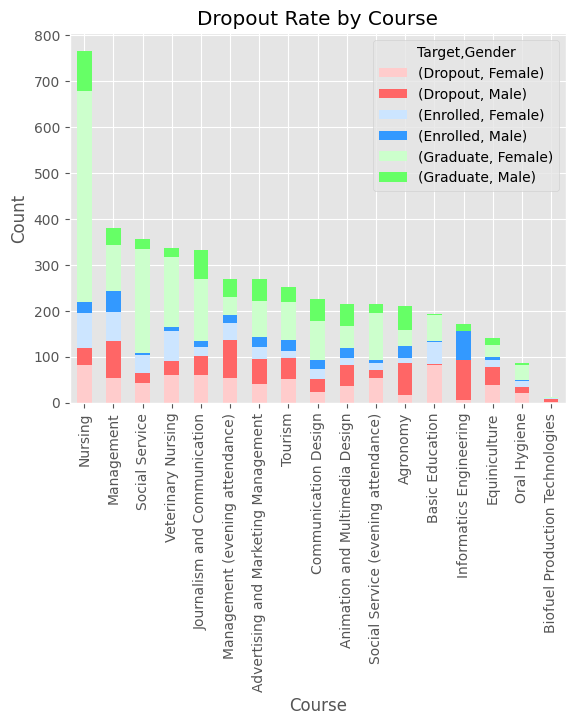

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original dataframe

# Create a crosstab to count Dropouts and Graduates by Course and Gender
dropout_rate_by_course_and_gender = pd.crosstab([df['Course'], df['Gender']], df['Target'])

# Sum Dropouts and Graduates by Course only (ignoring Gender for sorting)
dropout_rate_by_course = dropout_rate_by_course_and_gender.groupby(level='Course').sum().sum(axis=1)

# Sort courses based on total number of students (Dropout + Graduate)
sorted_courses = dropout_rate_by_course.sort_values(ascending=False).index

# Reindex the crosstab to match the sorted course order
dropout_rate_by_course_and_gender_sorted = dropout_rate_by_course_and_gender.reindex(sorted_courses, level='Course')

# Plot stacked bar chart
colors = ['#ffcccc', '#ff6666', '#cce5ff', '#3399ff', '#ccffcc', '#66ff66']  # Light and dark shades for female, male
dropout_rate_by_course_and_gender_sorted.unstack().plot(kind='bar', stacked=True, color=colors)

plt.title('Dropout Rate by Course')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()


From this distribution we can clearly see that some courses are less likely to be dropped than other courses. For example Nursing is less likely to be dropped than Informatics Engineering. However Nursing is a heavily female course, and Informatics Engineering is a heavily male dominated course, so we would expect nursing to have relatively less dropouts than informatics because men are more likely to drop courses in general.